In [143]:
import sys
import os

# Add the parent directory of `notebook/` to sys.path
sys.path.append(os.path.abspath(".."))
import numpy as np
import pandas as pd
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.io.ase import AseAtomsAdaptor
from multiprocessing import Pool, cpu_count
from ase import Atoms

import matplotlib.pyplot as plt
# Load the saved dataframe
df = pd.read_pickle(f"../dataset/symmetrized_permittivity.pkl")

### $$\chi_{i j}^{(1)}(\omega)=\mathrm{i} \frac{\sigma_{i j}^{(1)}(\omega)}{\omega}=\mathrm{i} \frac{\operatorname{Re}\left\{\sigma_{i j}^{(1)}(\omega)\right\}}{\omega}-\frac{\operatorname{Im}\left\{\sigma_{i j}^{(1)}(\omega)\right\}}{\omega}$$

In [144]:
# optical conductivity calculations 
row = df.iloc[70]
real_permittivty = row["real_symmetrized_permittivity"]
imag_permittivty = row["imag_symmetrized_permittivity"]
omega = row['omega']
omega = np.where(omega == 0, np.finfo(float).eps, omega)
permittivity_complex = real_permittivty + 1j*imag_permittivty
conductivity_complex = 1j * permittivity_complex / omega[:, np.newaxis, np.newaxis]


/tmp/ipykernel_1128058/3267214424.py:8: RuntimeWarning: divide by zero encountered in divide
  conductivity_complex = 1j * permittivity_complex / omega[:, np.newaxis, np.newaxis]
/tmp/ipykernel_1128058/3267214424.py:8: RuntimeWarning: invalid value encountered in divide
  conductivity_complex = 1j * permittivity_complex / omega[:, np.newaxis, np.newaxis]


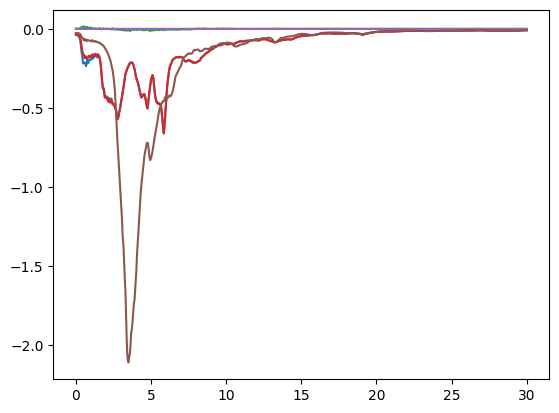

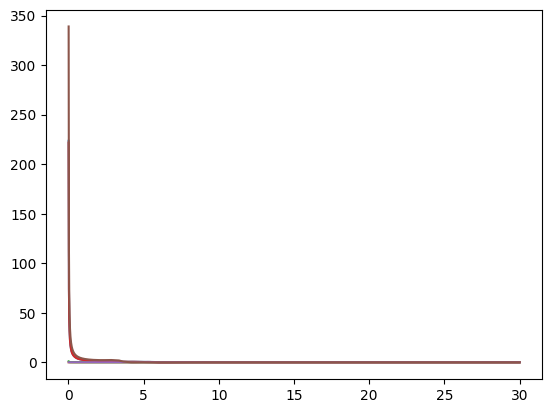

In [145]:
conductivity_real = conductivity_complex.real
conductivity_imag = conductivity_complex.imag

for i in range(3):
    for j in range(i,3):
        plt.plot(omega, conductivity_real[:,i,j])
plt.show()

for i in range(3):
    for j in range(i,3):
        plt.plot(omega[:], conductivity_imag[:,i,j])
plt.show()

# Calculate Kerr rotation
### $$\theta_K+i \epsilon_K=\frac{-\sigma_{x y}}{\sigma_{x x} \sqrt{1+i(4 \pi / \omega) \sigma_{x x}}}$$

/tmp/ipykernel_1128058/2618529421.py:1: RuntimeWarning: divide by zero encountered in divide
  Kerr_complex = conductivity_complex[:,0,1] / (conductivity_complex[:,0,0] * np.sqrt(1+ 1j * 4 * np.pi /omega * conductivity_complex[:,0,0]))
/tmp/ipykernel_1128058/2618529421.py:1: RuntimeWarning: invalid value encountered in divide
  Kerr_complex = conductivity_complex[:,0,1] / (conductivity_complex[:,0,0] * np.sqrt(1+ 1j * 4 * np.pi /omega * conductivity_complex[:,0,0]))


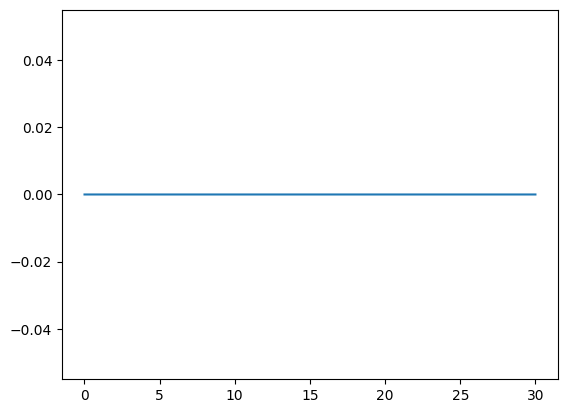

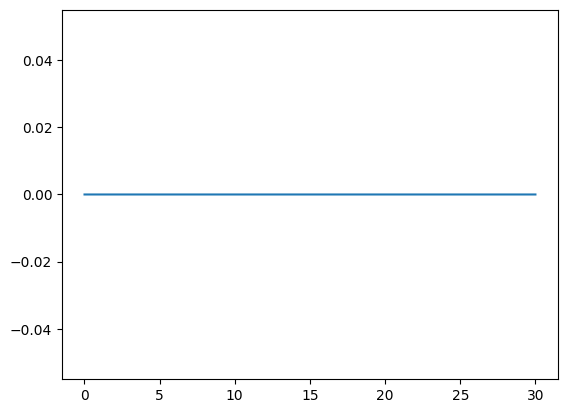

In [146]:
Kerr_complex = conductivity_complex[:,0,1] / (conductivity_complex[:,0,0] * np.sqrt(1+ 1j * 4 * np.pi /omega * conductivity_complex[:,0,0]))
theta_K = Kerr_complex.real
epsilon_K = Kerr_complex.imag
plt.plot(omega,theta_K)
plt.show()
plt.plot(omega,epsilon_K)
plt.show()

# Each row do

In [147]:
def get_Kerr_spectra(omega, conductivity_complex):
    kerr_complex = conductivity_complex[:, 0, 1] / (
        conductivity_complex[:, 0, 0] * np.sqrt(1 + 1j * 4 * np.pi / omega * conductivity_complex[:, 0, 0])
    )
    theta_K = kerr_complex.real
    epsilon_K = kerr_complex.imag
    return theta_K, epsilon_K, kerr_complex


def process_row(row):
    real_permittivity = row["real_symmetrized_permittivity"]
    imag_permittivity = row["imag_symmetrized_permittivity"]
    omega = row["omega"]

    # Replace 0s in omega to avoid division by zero
    omega = np.where(omega == 0, np.finfo(float).eps, omega)

    permittivity_complex = real_permittivity + 1j * imag_permittivity
    conductivity_complex = -1j * permittivity_complex / omega[:, np.newaxis, np.newaxis]

    # Optional: plot the components
    # for i in range(3):
    #     for j in range(i, 3):
    #         plt.plot(omega, conductivity_complex.real[:, i, j])
    # plt.show()

    # for i in range(3):
    #     for j in range(i, 3):
    #         plt.plot(omega, conductivity_complex.imag[:, i, j])
    # plt.show()

    theta_K, epsilon_K, kerr_complex = get_Kerr_spectra(omega, conductivity_complex)

    # Store results in row
    row["conductivity_complex"] = conductivity_complex
    row["theta_K"] = theta_K
    row["epsilon_K"] = epsilon_K
    row["kerr_complex"] = kerr_complex
    return row

# Apply to the whole DataFrame
df = df.apply(process_row, axis=1)


/tmp/ipykernel_1128058/2723866005.py:19: RuntimeWarning: divide by zero encountered in divide
  conductivity_complex = -1j * permittivity_complex / omega[:, np.newaxis, np.newaxis]
/tmp/ipykernel_1128058/2723866005.py:19: RuntimeWarning: invalid value encountered in divide
  conductivity_complex = -1j * permittivity_complex / omega[:, np.newaxis, np.newaxis]
/tmp/ipykernel_1128058/2723866005.py:3: RuntimeWarning: divide by zero encountered in divide
  conductivity_complex[:, 0, 0] * np.sqrt(1 + 1j * 4 * np.pi / omega * conductivity_complex[:, 0, 0])
/tmp/ipykernel_1128058/2723866005.py:3: RuntimeWarning: invalid value encountered in divide
  conductivity_complex[:, 0, 0] * np.sqrt(1 + 1j * 4 * np.pi / omega * conductivity_complex[:, 0, 0])
/tmp/ipykernel_1128058/2723866005.py:2: RuntimeWarning: invalid value encountered in divide
  kerr_complex = conductivity_complex[:, 0, 1] / (
/tmp/ipykernel_1128058/2723866005.py:19: RuntimeWarning: divide by zero encountered in divide
  conductivit

/tmp/ipykernel_1128058/2723866005.py:19: RuntimeWarning: divide by zero encountered in divide
  conductivity_complex = -1j * permittivity_complex / omega[:, np.newaxis, np.newaxis]
/tmp/ipykernel_1128058/2723866005.py:19: RuntimeWarning: invalid value encountered in divide
  conductivity_complex = -1j * permittivity_complex / omega[:, np.newaxis, np.newaxis]
/tmp/ipykernel_1128058/2723866005.py:3: RuntimeWarning: divide by zero encountered in divide
  conductivity_complex[:, 0, 0] * np.sqrt(1 + 1j * 4 * np.pi / omega * conductivity_complex[:, 0, 0])
/tmp/ipykernel_1128058/2723866005.py:3: RuntimeWarning: invalid value encountered in divide
  conductivity_complex[:, 0, 0] * np.sqrt(1 + 1j * 4 * np.pi / omega * conductivity_complex[:, 0, 0])
/tmp/ipykernel_1128058/2723866005.py:2: RuntimeWarning: invalid value encountered in divide
  kerr_complex = conductivity_complex[:, 0, 1] / (
/tmp/ipykernel_1128058/2723866005.py:19: RuntimeWarning: divide by zero encountered in divide
  conductivit

In [148]:
row

folder                           /global/cfs/cdirs/m225/angush/materialProject/...
formula                                                                   Cd2Hg2O4
symmetrized_structure            (Atom('Cd', [0.0, 0.0, 0.0], index=0), Atom('C...
mp_id                                                                   mp-2695851
bandgap                                                                     0.3315
crystal_system                                                          monoclinic
omega                            [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...
real_Permittivity_Matrices       [[[2.2357675719739616, -6.2803296787886835e-09...
imag_Permittivity_Matrices       [[[2.1965402727404944e-17, -3.3084647708206443...
Re_00                            [2.2357675719739616, 2.235805444627857, 2.2359...
Re_01                            [-6.2803296787886835e-09, -6.28021209688639e-0...
Re_02                            [0.00919288400570403, 0.009191419660836366, 0....
Re_1

folder                           /global/cfs/cdirs/m225/angush/materialProject/...
formula                                                                      Cl6I2
symmetrized_structure            (Atom('I', [6.70450081016479, 7.74027737386009...
mp_id                                                                   mp-1546049
bandgap                                                                     1.5693
crystal_system                                                           triclinic
omega                            [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...
real_Permittivity_Matrices       [[[1.995068208517579, 0.8905127969293462, 0.50...
imag_Permittivity_Matrices       [[[6.1475038000275625e-18, 8.4918732232799e-18...
Re_00                            [1.995068208517579, 1.9950787518090818, 1.9951...
Re_01                            [0.8905127969293462, 0.8905196849270957, 0.890...
Re_02                            [0.5000925441886601, 0.5000964428493266, 0.500...
Re_1

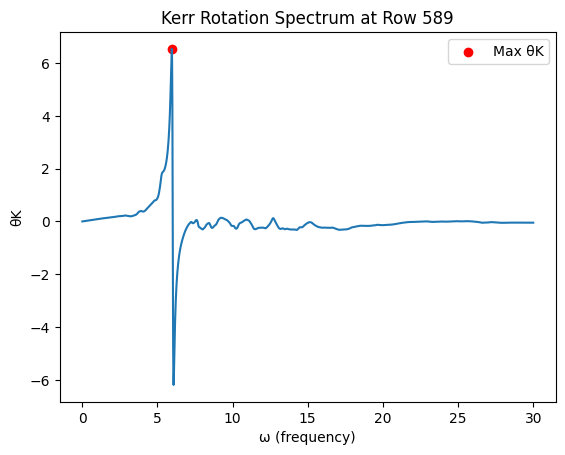

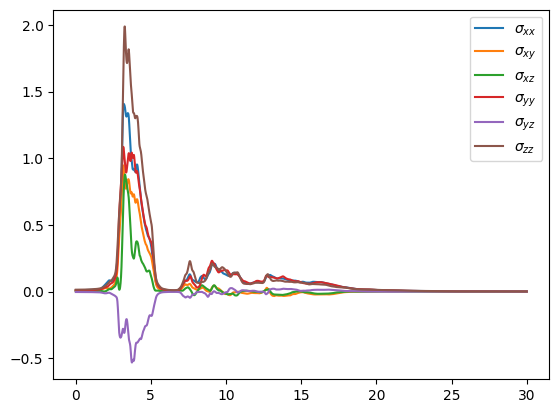

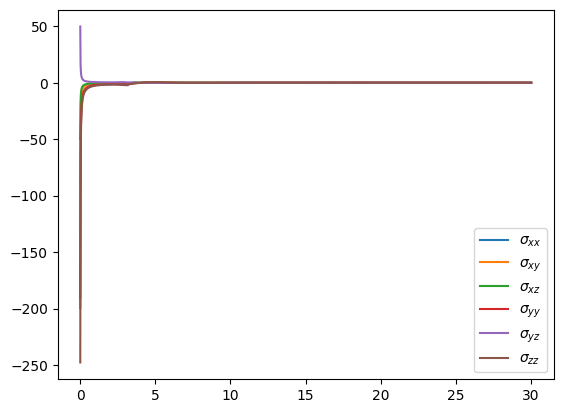

In [149]:
# Step 1: Compute max theta_K per row (skip if already done)
df["theta_K_max_per_row"] = df["theta_K"].apply(lambda x: np.nanmax(np.abs(x)))

# Step 2: Get index of the row with the global max
row_idx_of_max = df["theta_K_max_per_row"].idxmax()

# Step 3: Extract the row and its omega/theta_K
row = df.loc[row_idx_of_max]
print(row)
theta_K_array = row["theta_K"]
omega_array = row["omega"]

# Step 4: Find the frequency where theta_K is maximum
idx_of_max_theta_K = np.nanargmax(theta_K_array)
omega_at_max = omega_array[idx_of_max_theta_K]
theta_K_max = theta_K_array[idx_of_max_theta_K]

# Step 5: Display everything
print("Row index with max theta_K:", row_idx_of_max)
print("Max theta_K value:", theta_K_max)
print("Frequency (omega) at max theta_K:", omega_at_max)

# Step 6: Plot
plt.plot(omega_array, theta_K_array)
plt.scatter([omega_at_max], [theta_K_max], color='red', label='Max θK')
plt.xlabel("ω (frequency)")
plt.ylabel("θK")
plt.legend()
plt.title("Kerr Rotation Spectrum at Row {}".format(row_idx_of_max))
plt.show()

xyz_list = ['x', 'y', 'z']
color_map = {
    'xx': '#1f77b4',  # Blue
    'xy': '#ff7f0e',  # Orange
    'xz': '#2ca02c',  # Green
    'yy': '#d62728',  # Red
    'yz': '#9467bd',  # Purple
    'zz': '#8c564b'   # Brown
}

for i in range(3):
    for j in range(i,3):
        component = f"{xyz_list[i]}{xyz_list[j]}"
        plt.plot(omega, row.conductivity_complex.real[:,i,j], label=rf"$\sigma_{{{xyz_list[i]}{xyz_list[j]}}}$", color=color_map[component])
plt.legend()
plt.show()

for i in range(3):
    for j in range(i,3):
        component = f"{xyz_list[i]}{xyz_list[j]}"
        plt.plot(omega[:], row.conductivity_complex.imag[:,i,j], label=rf"$\sigma_{{{xyz_list[i]}{xyz_list[j]}}}$", color=color_map[component])
plt.legend()

plt.show()

# from pymatgen.io.vasp import Poscar
# from pymatgen.io.ase import AseAtomsAdaptor  # Import the converter
# sym_prec = 1e-2
# tolerance = 1e-2

# pymatgen_structure = AseAtomsAdaptor.get_structure(row.symmetrized_structure)

# # Now use the pymatgen Structure with SpacegroupAnalyzer
# sga_primitive = SpacegroupAnalyzer(pymatgen_structure, symprec=sym_prec)
# refined_structure = sga_primitive.get_refined_structure()
# print(len(sga_primitive.get_symmetry_operations(cartesian=True)))
# refined_sga = SpacegroupAnalyzer(refined_structure, symprec=sym_prec)
# symmetry_operations = refined_sga.get_symmetry_operations(cartesian=True)
# print(len(symmetry_operations))
# poscar = Poscar(pymatgen_structure)
# poscar.write_file("POSCAR")

      theta_K_max_per_row       mp_id crystal_system    formula
797          1.863721e-16  mp-1079483       trigonal  Au3F18Li3
923          1.108659e-16     mp-7922       trigonal  Ca3F18Pd3
1367         1.108330e-16     mp-7921       trigonal  F18Mg3Pd3
885          1.071064e-16  mp-1391273       trigonal  F18Ni3Zn3
1398         1.064647e-16    mp-28483       trigonal     Br18W3
1203         1.030567e-16    mp-36508       trigonal  F18Hg3Sn3
1219         9.987808e-17  mp-1323553       trigonal  Ca3F18Ni3
757          9.874124e-17    mp-13983       trigonal  F18Pd3Zn3
1043         9.749501e-17    mp-23218       trigonal     As6I18
1195         9.439057e-17   mp-547792       trigonal    K2O6Sb2


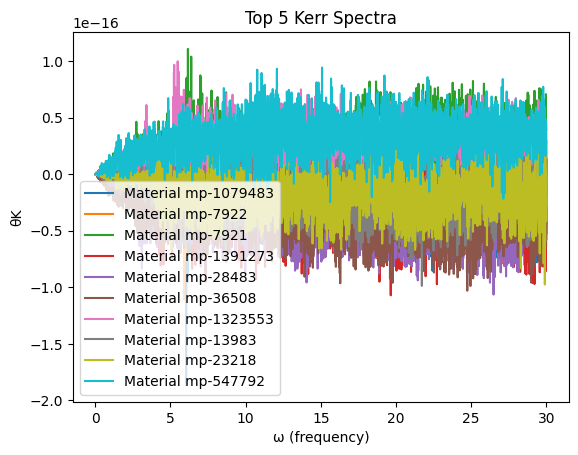

In [150]:
df_filtered = df[df["crystal_system"] != "triclinic"]
df_sorted = df_filtered.sort_values(by="theta_K_max_per_row", ascending=False)
print(df_sorted[["theta_K_max_per_row", "mp_id","crystal_system" ,"formula"]].head(10))  # replace with your ID column

for i in range(10):  # top 5 materials
    row = df_sorted.iloc[i]
    omega = row["omega"]
    theta_K = row["theta_K"]
    plt.plot(omega, theta_K, label=f"Material {row['mp_id']}")  # adjust if different ID
plt.legend()
plt.xlabel("ω (frequency)")
plt.ylabel("θK")
plt.title("Top 5 Kerr Spectra")
plt.show()

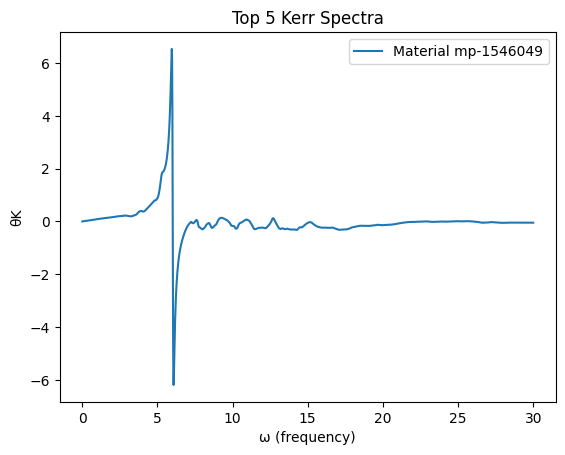

In [156]:
row = df_sorted.iloc[0]
omega = row["omega"]
theta_K = row["theta_K"]
plt.plot(omega, theta_K, label=f"Material {row['mp_id']}")  # adjust if different ID
plt.legend()
plt.xlabel("ω (frequency)")
plt.ylabel("θK")
plt.title("Top 5 Kerr Spectra")
plt.show()

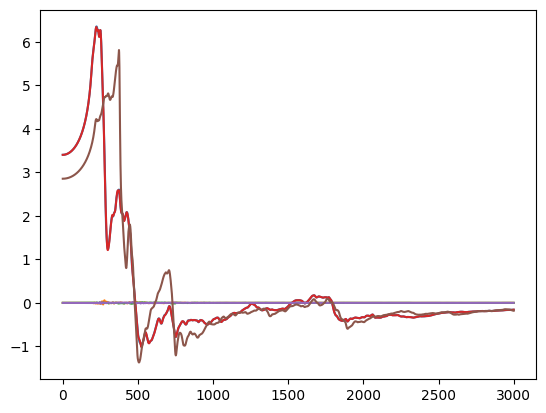

In [157]:
check = df.iloc[780]
for i in range(3):
    for j in range(i, 3):
        plt.plot(check.real_Permittivity_Matrices[:,i,j])
plt.show()

/tmp/ipykernel_1128058/31434452.py:25: RuntimeWarning: divide by zero encountered in divide
  conductivity_complex = -1j * permittivity_complex / omega[:, np.newaxis, np.newaxis]
/tmp/ipykernel_1128058/31434452.py:25: RuntimeWarning: invalid value encountered in divide
  conductivity_complex = -1j * permittivity_complex / omega[:, np.newaxis, np.newaxis]
/tmp/ipykernel_1128058/31434452.py:8: RuntimeWarning: divide by zero encountered in divide
  conductivity_complex[:, 0, 0] * np.sqrt(1 + 1j * 4 * np.pi / omega * conductivity_complex[:, 0, 0])
/tmp/ipykernel_1128058/31434452.py:8: RuntimeWarning: invalid value encountered in divide
  conductivity_complex[:, 0, 0] * np.sqrt(1 + 1j * 4 * np.pi / omega * conductivity_complex[:, 0, 0])
/tmp/ipykernel_1128058/31434452.py:7: RuntimeWarning: invalid value encountered in divide
  kerr_complex = conductivity_complex[:, 0, 1] / (


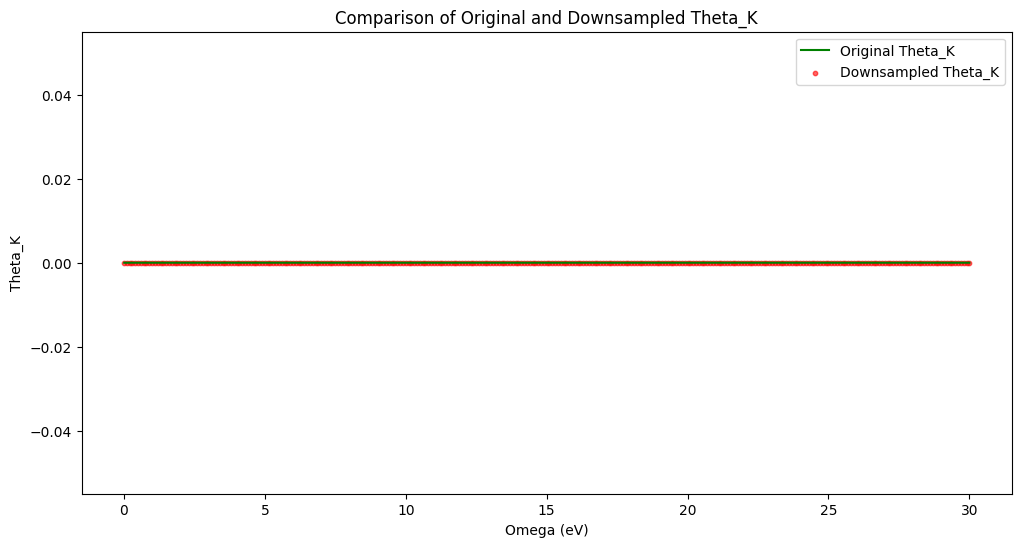

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Define the Kerr spectra function
def get_Kerr_spectra(omega, conductivity_complex):
    kerr_complex = conductivity_complex[:, 0, 1] / (
        conductivity_complex[:, 0, 0] * np.sqrt(1 + 1j * 4 * np.pi / omega * conductivity_complex[:, 0, 0])
    )
    theta_K = kerr_complex.real
    epsilon_K = kerr_complex.imag
    return theta_K, epsilon_K, kerr_complex

# Process each row to calculate original and downsampled Kerr spectra
def process_row(row):
    real_permittivity = row["real_symmetrized_permittivity"]
    imag_permittivity = row["imag_symmetrized_permittivity"]
    omega = row["omega"]

    # Replace 0s in omega to avoid division by zero
    omega = np.where(omega == 0, np.finfo(float).eps, omega)

    # Create complex permittivity matrix from the transformed real and imaginary parts
    permittivity_complex = real_permittivity + 1j * imag_permittivity
    conductivity_complex = -1j * permittivity_complex / omega[:, np.newaxis, np.newaxis]

    # Calculate Kerr spectra for the log-transformed data
    theta_K, epsilon_K, kerr_complex = get_Kerr_spectra(omega, conductivity_complex)

    # Store results in row for comparison later
    row["conductivity_complex"] = conductivity_complex
    row["theta_K_original"] = theta_K
    row["epsilon_K_original"] = epsilon_K
    row["kerr_complex_original"] = kerr_complex
    return row

# Apply to the whole DataFrame
df = df.apply(process_row, axis=1)

# Interpolation function
energy_min = 0.0
energy_max = 30.0
nstep = 301
new_x = np.linspace(energy_min, energy_max, nstep, dtype=np.float64)

def interpolate_matrix(matrix, omega, new_grid=new_x):
    """High-precision interpolation of a (N, 3, 3) tensor along the energy axis."""
    omega = np.asarray(omega, dtype=np.float64)
    matrix = np.asarray(matrix, dtype=np.float64)
    
    interp = interp1d(
        omega,
        matrix,
        kind='linear',
        axis=0,
        fill_value=0,  # instead of 0
        bounds_error=False
    )
    return interp(new_grid)  # Returns shape (nstep, 3, 3)

# Apply interpolation to imag and real permittivity matrices
df['imag_Permittivity_Matrices_interp'] = [
    interpolate_matrix(row['imag_symmetrized_permittivity'], row['omega']) for _, row in df.iterrows()
]
df['real_Permittivity_Matrices_interp'] = [
    interpolate_matrix(row['real_symmetrized_permittivity'], row['omega']) for _, row in df.iterrows()
]

# Process row with downsampled omega data
def process_row_with_interp(row):
    real_permittivity = row["real_Permittivity_Matrices_interp"]
    imag_permittivity = row["imag_Permittivity_Matrices_interp"]
    omega = new_x  # Use downsampled omega

    # Replace 0s in omega to avoid division by zero
    omega = np.where(omega == 0, np.finfo(float).eps, omega)

    # Create complex permittivity matrix from the transformed real and imaginary parts
    permittivity_complex = real_permittivity + 1j * imag_permittivity
    conductivity_complex = -1j * permittivity_complex / omega[:, np.newaxis, np.newaxis]

    # Calculate Kerr spectra for the downsampled data
    theta_K, epsilon_K, kerr_complex = get_Kerr_spectra(omega, conductivity_complex)

    # Store results in row for comparison
    row["theta_K_downsampled"] = theta_K
    row["epsilon_K_downsampled"] = epsilon_K
    row["kerr_complex_downsampled"] = kerr_complex
    return row

# Apply to the whole DataFrame with interpolated data
df = df.apply(process_row_with_interp, axis=1)

# Visualize the effect of downsampling by comparing original and downsampled data
def plot_comparison(df):
    for _, row in df.iterrows():
        plt.figure(figsize=(12, 6))
        # plt.plot(row["omega"], row["imag_symmetrized_permittivity"][:,0,1], label="Original Theta_K", color='green')
        # plt.scatter(new_x, row["imag_Permittivity_Matrices_interp"][:,0,1], label="Downsampled Theta_K", alpha=0.6, s=10, color='red')

        plt.plot(row["omega"], row["theta_K_original"], label="Original Theta_K", color='green')
        plt.scatter(new_x, row["theta_K_downsampled"], label="Downsampled Theta_K", alpha=0.6, s=10, color='red')
        plt.xlabel("Omega (eV)")
        plt.ylabel("Theta_K")
        plt.legend()
        plt.title("Comparison of Original and Downsampled Theta_K")
        plt.show()


# Visualize the comparison for the first few rows
# plot_comparison(df[df["crystal_system"] != "triclinic"].head(10))
# plot_comparison(df.sample(10))
plot_comparison(df[df["mp_id"]=="mp-29806"])



folder                               /global/cfs/cdirs/m225/angush/materialProject/...
formula                                                                          Cl6I2
symmetrized_structure                (Atom('I', [6.70450081016479, 7.74027737386009...
mp_id                                                                       mp-1546049
bandgap                                                                         1.5693
crystal_system                                                               triclinic
omega                                [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...
real_Permittivity_Matrices           [[[1.995068208517579, 0.8905127969293462, 0.50...
imag_Permittivity_Matrices           [[[6.1475038000275625e-18, 8.4918732232799e-18...
Re_00                                [1.995068208517579, 1.9950787518090818, 1.9951...
Re_01                                [0.8905127969293462, 0.8905196849270957, 0.890...
Re_02                                [0.500

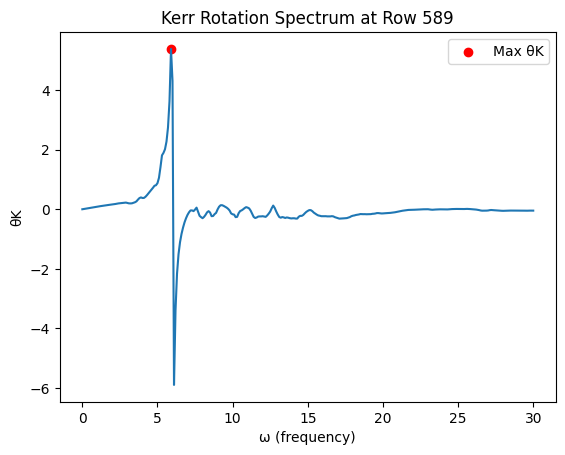

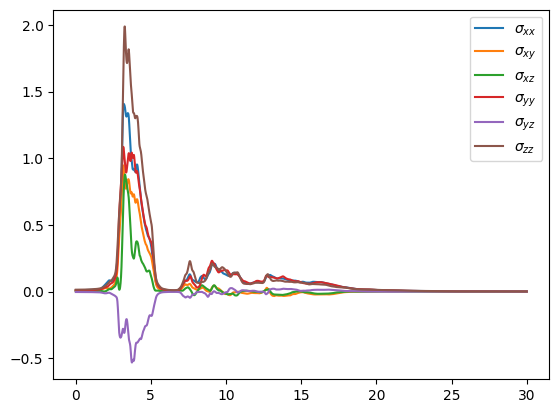

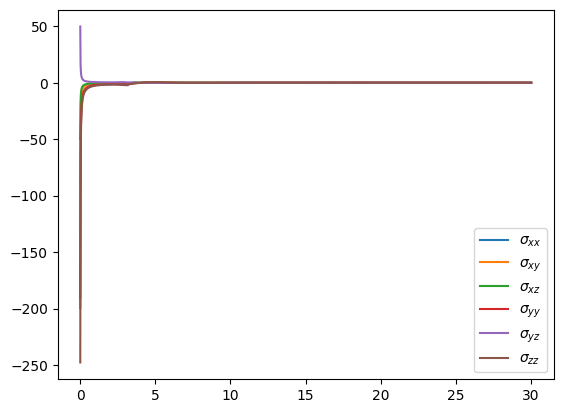

In [159]:
# Step 1: Compute max theta_K per row (skip if already done)
df["theta_K_downsampling_max_per_row"] = df["theta_K_downsampled"].apply(lambda x: np.nanmax(np.abs(x)))

# Step 2: Get index of the row with the global max
row_idx_of_max = df["theta_K_downsampling_max_per_row"].idxmax()

# Step 3: Extract the row and its omega/theta_K
row = df.loc[row_idx_of_max]
print(row)
theta_K_array = row["theta_K_downsampled"]
omega_array = new_x

# Step 4: Find the frequency where theta_K is maximum
idx_of_max_theta_K = np.nanargmax(theta_K_array)
omega_at_max = omega_array[idx_of_max_theta_K]
theta_K_max = theta_K_array[idx_of_max_theta_K]

# Step 5: Display everything
print("Row index with max theta_K:", row_idx_of_max)
print("Max theta_K value:", theta_K_max)
print("Frequency (omega) at max theta_K:", omega_at_max)

# Step 6: Plot
plt.plot(omega_array, theta_K_array)
plt.scatter([omega_at_max], [theta_K_max], color='red', label='Max θK')
plt.xlabel("ω (frequency)")
plt.ylabel("θK")
plt.legend()
plt.title("Kerr Rotation Spectrum at Row {}".format(row_idx_of_max))
plt.show()

xyz_list = ['x', 'y', 'z']
color_map = {
    'xx': '#1f77b4',  # Blue
    'xy': '#ff7f0e',  # Orange
    'xz': '#2ca02c',  # Green
    'yy': '#d62728',  # Red
    'yz': '#9467bd',  # Purple
    'zz': '#8c564b'   # Brown
}

for i in range(3):
    for j in range(i,3):
        component = f"{xyz_list[i]}{xyz_list[j]}"
        plt.plot(omega, row.conductivity_complex.real[:,i,j], label=rf"$\sigma_{{{xyz_list[i]}{xyz_list[j]}}}$", color=color_map[component])
plt.legend()
plt.show()

for i in range(3):
    for j in range(i,3):
        component = f"{xyz_list[i]}{xyz_list[j]}"
        plt.plot(omega[:], row.conductivity_complex.imag[:,i,j], label=rf"$\sigma_{{{xyz_list[i]}{xyz_list[j]}}}$", color=color_map[component])
plt.legend()

plt.show()

# from pymatgen.io.vasp import Poscar
# from pymatgen.io.ase import AseAtomsAdaptor  # Import the converter
# sym_prec = 1e-2
# tolerance = 1e-2

# pymatgen_structure = AseAtomsAdaptor.get_structure(row.symmetrized_structure)

# # Now use the pymatgen Structure with SpacegroupAnalyzer
# sga_primitive = SpacegroupAnalyzer(pymatgen_structure, symprec=sym_prec)
# refined_structure = sga_primitive.get_refined_structure()
# print(len(sga_primitive.get_symmetry_operations(cartesian=True)))
# refined_sga = SpacegroupAnalyzer(refined_structure, symprec=sym_prec)
# symmetry_operations = refined_sga.get_symmetry_operations(cartesian=True)
# print(len(symmetry_operations))
# poscar = Poscar(pymatgen_structure)
# poscar.write_file("POSCAR")

      theta_K_downsampling_max_per_row       mp_id crystal_system    formula
589                           5.896189  mp-1546049      triclinic      Cl6I2
196                           1.678340  mp-1100795      triclinic     Cl6Zr2
1127                          0.778626  mp-2929431      triclinic       H2I6
926                           0.597444    mp-28174      triclinic    Cl6PdS2
585                           0.400165  mp-2422143      triclinic   Br2PdSe6
1016                          0.362151  mp-1079487      triclinic   Br4Nb2S4
1444                          0.286216  mp-1542038      triclinic  Cs2Se6Sn2
313                           0.270452   mp-568146      triclinic   Br2PdSe6
1116                          0.255033    mp-29443      triclinic       I4P2
1109                          0.254701   mp-561710      triclinic   Cs2S6Sn2


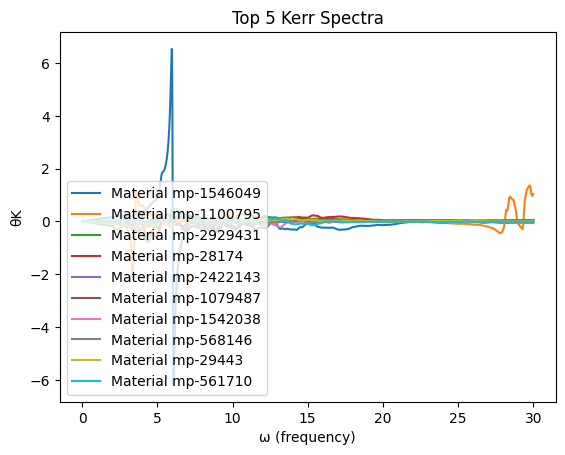

In [160]:
df_sorted = df.sort_values(by="theta_K_downsampling_max_per_row", ascending=False)
print(df_sorted[["theta_K_downsampling_max_per_row", "mp_id","crystal_system" ,"formula"]].head(10))  # replace with your ID column

for i in range(10):  # top 5 materials
    row = df_sorted.iloc[i]
    omega = row["omega"]
    theta_K = row["theta_K"]
    plt.plot(omega, theta_K, label=f"Material {row['mp_id']}")  # adjust if different ID
plt.legend()
plt.xlabel("ω (frequency)")
plt.ylabel("θK")
plt.title("Top 5 Kerr Spectra")
plt.show()